### The Sparks Fountain - GRIP - Data Science and Business Analytics - June 2022

### Task 6: Prediction using Decision Tree Algorithm 

### Author: Gudipudi Jhansi Priya 

### Dataset: https://bit.ly/3kXTdox

##### The first step is to import the libraries that are required for the implementation of the code operation.

##### Here we import the Pandas to import and analyze data, NumPy to perform the multi-dimensional operation, and matplotlib to perform graphical plot into the context.



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset


In [10]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##### Top 5 rows of dataset

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### Summary of dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


###### Dimensions of dataset

In [13]:
df.shape

(150, 6)

###### Missing values in variables

In [14]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

###### Declare feature vector and target variable 

In [15]:
df.value_counts()

Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
1    5.1            3.5           1.4            0.2           Iris-setosa        1
95   5.6            2.7           4.2            1.3           Iris-versicolor    1
97   5.7            2.9           4.2            1.3           Iris-versicolor    1
98   6.2            2.9           4.3            1.3           Iris-versicolor    1
99   5.1            2.5           3.0            1.1           Iris-versicolor    1
                                                                                 ..
51   7.0            3.2           4.7            1.4           Iris-versicolor    1
52   6.4            3.2           4.5            1.5           Iris-versicolor    1
53   6.9            3.1           4.9            1.5           Iris-versicolor    1
54   5.5            2.3           4.0            1.3           Iris-versicolor    1
150  5.9            3.0           5.1            1.8           Iris-virginica    

##### check missing values in variables

In [16]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
x = df.drop(['Species'],axis=1)
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [18]:
y=df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

### Visualizing Iris Data

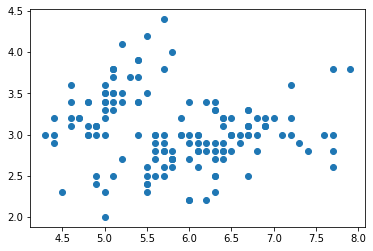

In [37]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

###### Using Seaborn lib to visualized 2 features based on target variable.

<Figure size 1080x648 with 0 Axes>

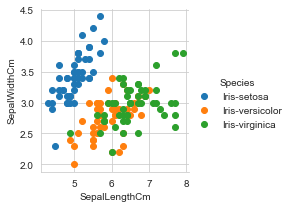

In [41]:

plt.figure(figsize=(15,9))
sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

###### Pair plot gives the relationship b/w all features distribution with each other..

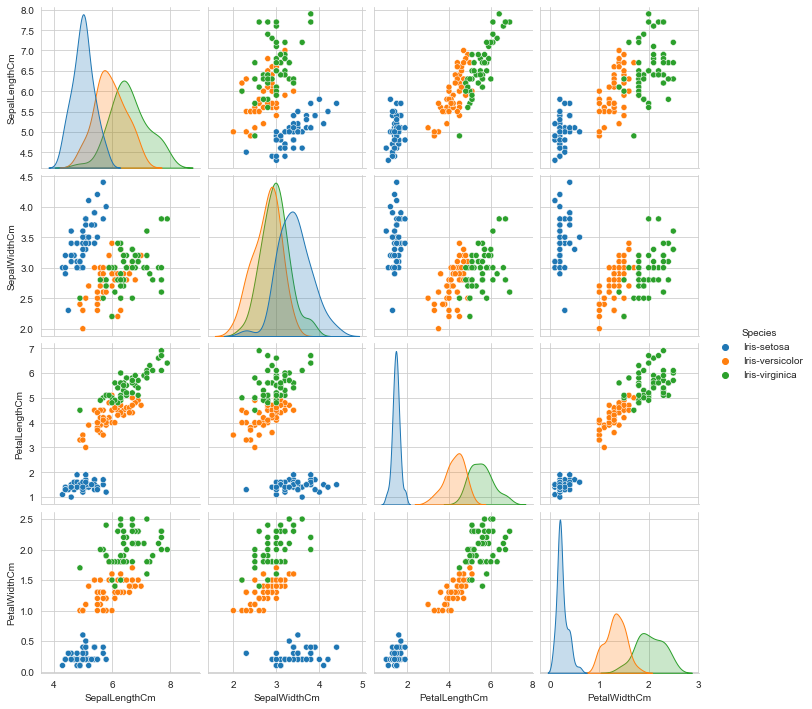

In [42]:
sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

##### Split data into separate training and test set 

In [19]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                        test_size = 0.25, random_state =42)

In [20]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5,5.0,3.6,1.4,0.2
32,33,5.2,4.1,1.5,0.1
142,143,5.8,2.7,5.1,1.9
85,86,6.0,3.4,4.5,1.6
86,87,6.7,3.1,4.7,1.5
...,...,...,...,...,...
71,72,6.1,2.8,4.0,1.3
106,107,4.9,2.5,4.5,1.7
14,15,5.8,4.0,1.2,0.2
92,93,5.8,2.6,4.0,1.2


In [21]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,74,6.1,2.8,4.7,1.2
18,19,5.7,3.8,1.7,0.3
118,119,7.7,2.6,6.9,2.3
78,79,6.0,2.9,4.5,1.5
76,77,6.8,2.8,4.8,1.4
31,32,5.4,3.4,1.5,0.4
64,65,5.6,2.9,3.6,1.3
141,142,6.9,3.1,5.1,2.3
68,69,6.2,2.2,4.5,1.5
82,83,5.8,2.7,3.9,1.2


In [22]:
y_train

4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 112, dtype: object

In [23]:
y_test


73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
Name: Species, dtype: object

In [24]:
### # check the shape of X_train and X_test
x_train.shape

(112, 5)

In [25]:
x_test.shape

(38, 5)

In [26]:
# check data types in X_train

x_train.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [27]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
4,5,5.0,3.6,1.4,0.2
32,33,5.2,4.1,1.5,0.1
142,143,5.8,2.7,5.1,1.9
85,86,6.0,3.4,4.5,1.6
86,87,6.7,3.1,4.7,1.5


##### Gini
##### Decision Tree Classifier with criterion gini index

In [28]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [29]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
clf_gini

DecisionTreeClassifier(max_depth=3, random_state=0)

##### Predict the Test set results with criterion gini index

In [30]:
y_pred_gini = clf_gini.predict(x_test)
y_pred_gini

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

###### Check accuracy score with criterion gini index 

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. 
                              format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 1.0000


##### Compare the train-set and test-set accuracy

In [32]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
 

In [33]:
print('Training-set accuracy score: {0:0.4f}'. 
                format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


##### Check for overfitting and underfitting

In [34]:
# print the scores on training and test set

print('Training set score: {:.4f}'.
             format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.
             format(clf_gini.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


##### Visualize decision-trees

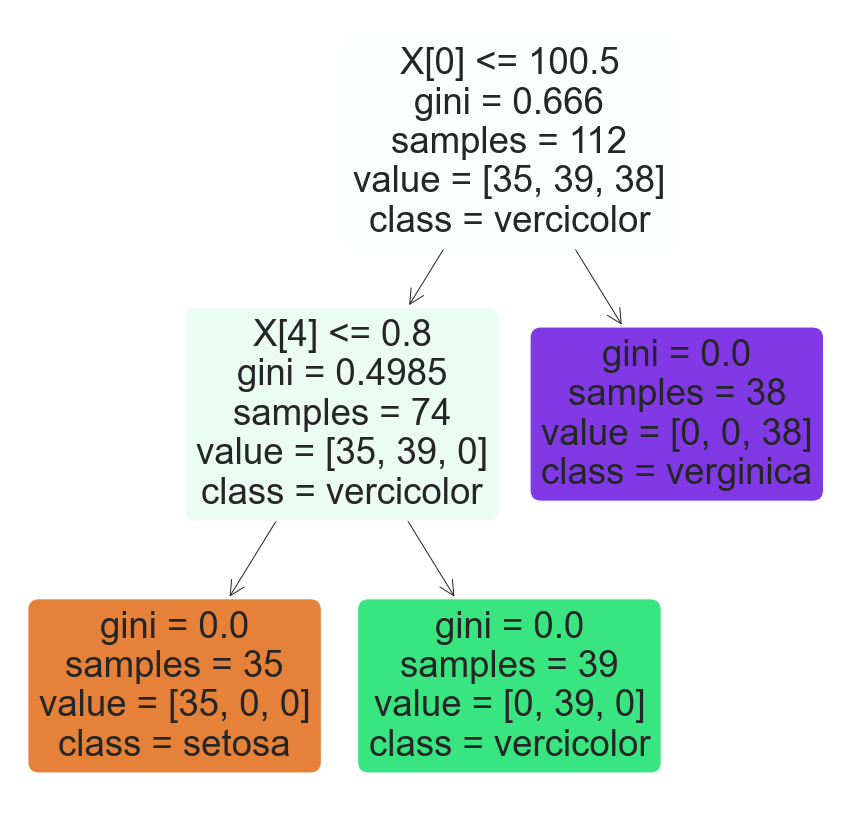

In [60]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
tree.plot_tree(clf_gini.fit(x_train, y_train)) 
dec_tree = tree.plot_tree(decision_tree=clf_gini,
                     class_names =["setosa", "vercicolor", "verginica"],
                     filled = True , precision = 4, rounded = True)

##### Entropy 

In [48]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy',
                                max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#### Predict the Test set results with criterion entropy

In [49]:
y_pred_en = clf_en.predict(x_test)
y_pred_en

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

##### Check accuracy score with criterion entropy

In [50]:
from sklearn.metrics import accuracy_score


print('Model accuracy score with criterion entropy: {0:0.4f}'.
                         format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 1.0000


##### Compare the train-set and test-set accuracy


In [51]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
 

In [52]:
print('Training-set accuracy score: {0:0.4f}'.
                  format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 1.0000


##### Check for overfitting and underfitting

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.
                   format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.
                   format(clf_en.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


##### Visualize decision-trees

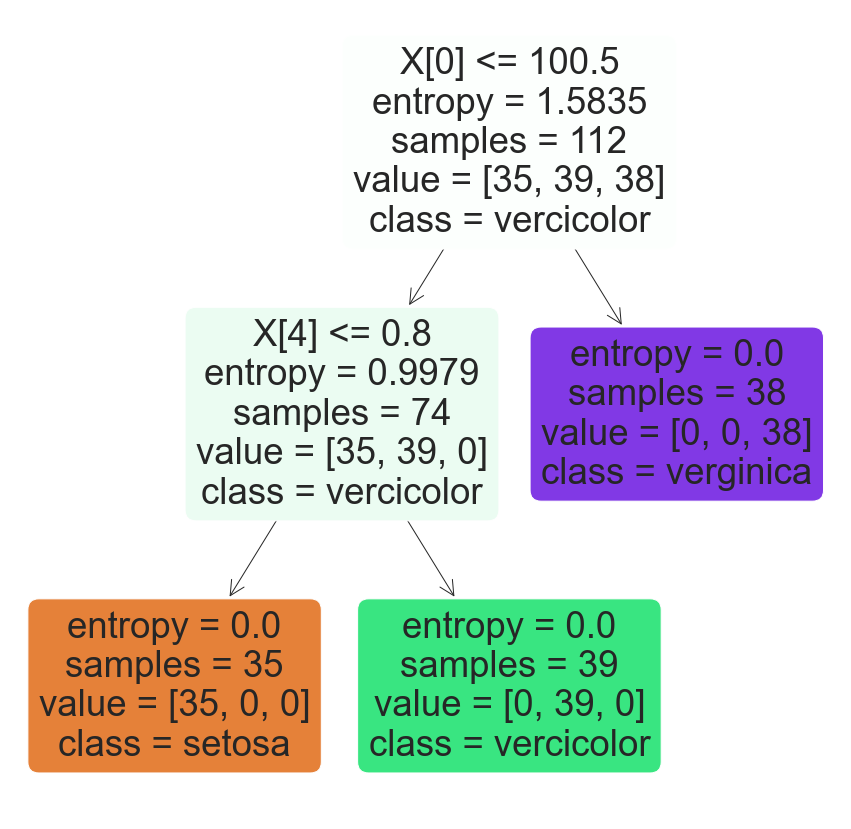

In [61]:
from sklearn import tree
plt.figure(figsize=(15,15))

tree.plot_tree(clf_en.fit(x_train, y_train)) 
dec_tree = tree.plot_tree(decision_tree=clf_en,class_names =["setosa", "vercicolor", "verginica"] ,
                     filled = True , precision = 4, rounded = True)

#### Confusion matrix 

In [55]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Text(0.5, 1.0, 'Accuracy Score: 1.0')

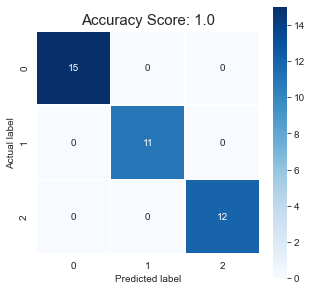

In [57]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_en)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, 
            annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf_en.score(x_test, y_test))
plt.title(all_sample_title, size = 15) 

####  Classification Report

In [58]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

